In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
pd.set_option("display.max_columns", 50)

In [3]:
df = pd.read_excel('WQ_updated_with_WQI.xlsx')

In [4]:
df.head()

,WRIS ID,PH,EC,TOT_ALKALINITY,CA,MG,NA,FE,CHLORIDE,SULPHATE,NITRATE,FLUORIDE,TDS,Total_hardness,WQI,GRADE,QUALITY
0,W23881,8.34,355.0,160.0,22.0,18.225,25.70,1.288,17.725,3.21,3.63,0.37,217.748,129.7225,52.765156,C,Poor
1,W38814,8.46,596.0,205.0,14.0,20.655,75.67,0.125,38.995,46.22,2.46,0.24,360.745,119.6855,81.601765,D,Very poor
2,W24111,8.24,429.0,150.0,10.0,32.805,23.32,0.183,31.905,24.15,0.06,0.68,243.370,159.5005,60.979152,C,Poor
3,W38806,8.21,1077.0,165.0,18.0,70.470,85.95,0.120,124.075,47.48,184.20,0.16,681.918,333.9270,153.279010,E,Unsuitable
4,W38807,8.17,394.0,135.0,14.0,34.020,15.24,0.648,38.995,8.22,0.30,0.62,233.172,174.4820,57.871346,C,Poor


In [5]:
df = pd.DataFrame(df)
df

,WRIS ID,PH,EC,TOT_ALKALINITY,CA,MG,NA,FE,CHLORIDE,SULPHATE,NITRATE,FLUORIDE,TDS,Total_hardness,WQI,GRADE,QUALITY
0,W23881,8.340,355.00,160.000,22.0000,18.225000,25.70,1.2880,17.725000,3.210000,3.6300,0.37,217.748,129.722500,52.765156,C,Poor
1,W38814,8.460,596.00,205.000,14.0000,20.655000,75.67,0.1250,38.995000,46.220000,2.4600,0.24,360.745,119.685500,81.601765,D,Very poor
2,W24111,8.240,429.00,150.000,10.0000,32.805000,23.32,0.1830,31.905000,24.150000,0.0600,0.68,243.370,159.500500,60.979152,C,Poor
3,W38806,8.210,1077.00,165.000,18.0000,70.470000,85.95,0.1200,124.075000,47.480000,184.2000,0.16,681.918,333.927000,153.279010,E,Unsuitable
4,W38807,8.170,394.00,135.000,14.0000,34.020000,15.24,0.6480,38.995000,8.220000,0.3000,0.62,233.172,174.482000,57.871346,C,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,W40584,7.482,340.70,40.032,8.0064,3.636893,32.16,0.0300,42.540000,9.360800,5.0385,0.12,170.800,34.927261,37.842339,B,Good
2261,W37760,7.416,162.30,55.000,10.0000,10.922330,5.62,2.0500,17.494575,10.035882,1.1000,0.13,76.560,69.781553,23.215488,A,Excellent
2262,W01435,7.092,199.56,50.000,26.0000,12.135922,18.48,0.0600,52.493025,31.239580,0.7000,0.19,95.730,114.757282,33.004805,B,Good
2263,W01435,6.743,173.20,25.020,14.0112,8.488350,16.18,0.0292,53.175000,4.373400,0.5268,1.10,90.720,69.830233,24.961848,A,Excellent


In [6]:
df_x = df.drop(['WRIS ID', 'WQI', 'QUALITY', 'GRADE'],axis=1)
df_y = df['GRADE']


In [8]:
### Scaling the dataset

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
scaler.fit(df_x)

StandardScaler()

In [11]:
scaled_features = scaler.transform(df_x)
scaled_features

array([[ 0.97626931, -0.59150839, -0.58473211, ..., -0.42554783,
        -0.59103139, -0.51487383],
       [ 1.21778134, -0.48719768, -0.36484523, ..., -0.54802722,
        -0.4969939 , -0.53679306],
       [ 0.77500928, -0.55947937, -0.63359585, ..., -0.13348161,
        -0.57418189, -0.44984339],
       ...,
       [-1.53545586, -0.65878663, -1.12223335, ..., -0.59513467,
        -0.6712727 , -0.54755551],
       [-2.23785336, -0.67019588, -1.244295  , ...,  0.26222102,
        -0.67456737, -0.64566908],
       [-0.64789913, -0.67647184, -1.12223335, ..., -0.57629169,
        -0.66534624, -0.72183882]])

In [12]:
df_feat = pd.DataFrame(scaled_features,columns=df_x.columns)
df_feat.head()

,PH,EC,TOT_ALKALINITY,CA,MG,NA,FE,CHLORIDE,SULPHATE,NITRATE,FLUORIDE,TDS,Total_hardness
0,0.976269,-0.591508,-0.584732,-0.501819,-0.435089,-0.528786,0.251312,-0.437741,-0.535069,-0.433217,-0.425548,-0.591031,-0.514874
1,1.217781,-0.487198,-0.364845,-0.595174,-0.401292,-0.403927,-0.372065,-0.406486,-0.354569,-0.446153,-0.548027,-0.496994,-0.536793
2,0.775009,-0.559479,-0.633596,-0.641852,-0.232304,-0.534733,-0.340976,-0.416905,-0.447190,-0.472690,-0.133482,-0.574182,-0.449843
3,0.714631,-0.279009,-0.560300,-0.548497,0.291556,-0.378240,-0.374745,-0.281467,-0.349281,1.563344,-0.623399,-0.285785,-0.068923
4,0.634127,-0.574628,-0.706891,-0.595174,-0.215406,-0.554923,-0.091733,-0.406486,-0.514043,-0.470036,-0.190011,-0.580888,-0.417126


In [13]:
df_x = scaled_features

### Importing essential packages

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.svm import SVC
svm = SVC(probability=True)

### Without smote and imblearn

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.30, random_state=101)

In [18]:
params_svm = {'C': [0.1,1, 10, 100, 1000], 'gamma': ['scale', 'auto'], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 

svm_gs = GridSearchCV(svm,params_svm,verbose=3)
                      
svm_gs.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=scal

[CV 4/5] END ................C=10, gamma=auto, kernel=linear; total time=   0.0s
[CV 5/5] END ................C=10, gamma=auto, kernel=linear; total time=   0.0s
[CV 1/5] END ..................C=10, gamma=auto, kernel=poly; total time=   0.0s
[CV 2/5] END ..................C=10, gamma=auto, kernel=poly; total time=   0.0s
[CV 3/5] END ..................C=10, gamma=auto, kernel=poly; total time=   0.0s
[CV 4/5] END ..................C=10, gamma=auto, kernel=poly; total time=   0.0s
[CV 5/5] END ..................C=10, gamma=auto, kernel=poly; total time=   0.0s
[CV 1/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [19]:
#save best model
svm_best = svm_gs.best_estimator_
print(svm_gs.best_params_)

{'C': 1000, 'gamma': 'scale', 'kernel': 'linear'}


In [21]:
pred_svm = svm_best.predict(X_test)
print(accuracy_score(y_test,pred_svm))
pd.crosstab(y_test,pred_svm) 

0.9882352941176471


col_0,A,B,C,D,E
GRADE,,,,,
A,29,0,0,0,0
B,0,81,2,0,0
C,0,0,79,3,0
D,0,0,1,54,1
E,0,0,0,1,429


### Applying SMOTE

In [35]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [36]:
X_train_sm, y_train_sm = sm.fit_resample(X_train.astype('float'),y_train)

In [37]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_sm))

Before SMOTE : Counter({'E': 1007, 'C': 173, 'B': 170, 'D': 150, 'A': 85})
After SMOTE : Counter({'E': 1007, 'C': 1007, 'D': 1007, 'B': 1007, 'A': 1007})


In [38]:
params_svm = {'C': [0.1,1, 10, 100, 1000], 'gamma': ['scale', 'auto'], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 

svm_gs = GridSearchCV(svm,params_svm,verbose=3)
                      
svm_gs.fit(X_train_sm,y_train_sm)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   1.3s
[CV 2/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   1.3s
[CV 3/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   1.3s
[CV 4/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   1.4s
[CV 5/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   1.3s
[CV 1/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   2.1s
[CV 2/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   2.1s
[CV 3/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   2.2s
[CV 4/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   2.2s
[CV 5/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   2.1s
[CV 1/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   3.4s
[CV 2/5] END .................C=0.1, gamma=scal

[CV 2/5] END ................C=10, gamma=auto, kernel=linear; total time=   1.3s
[CV 3/5] END ................C=10, gamma=auto, kernel=linear; total time=   1.4s
[CV 4/5] END ................C=10, gamma=auto, kernel=linear; total time=   1.3s
[CV 5/5] END ................C=10, gamma=auto, kernel=linear; total time=   1.2s
[CV 1/5] END ..................C=10, gamma=auto, kernel=poly; total time=   1.4s
[CV 2/5] END ..................C=10, gamma=auto, kernel=poly; total time=   1.6s
[CV 3/5] END ..................C=10, gamma=auto, kernel=poly; total time=   1.5s
[CV 4/5] END ..................C=10, gamma=auto, kernel=poly; total time=   1.5s
[CV 5/5] END ..................C=10, gamma=auto, kernel=poly; total time=   1.5s
[CV 1/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   1.4s
[CV 2/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   1.5s
[CV 3/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   1.5s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [39]:
#save best model
svm_best = svm_gs.best_estimator_
print(svm_gs.best_params_)

{'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}


In [41]:
pred_svm = svm_best.predict(X_test)
print(accuracy_score(y_test,pred_svm))
pd.crosstab(y_test,pred_svm)  

0.9632352941176471


col_0,A,B,C,D,E
GRADE,,,,,
A,28,1,0,0,0
B,7,72,4,0,0
C,0,3,75,4,0
D,0,0,3,53,0
E,0,0,0,3,427


### Evaluating the model with ROC plot

In [48]:
random_prob = [0 for _ in range(len(y_test))]
svm_probs = svm_best.predict_proba(X_test)

In [49]:
import scikitplot as skplt

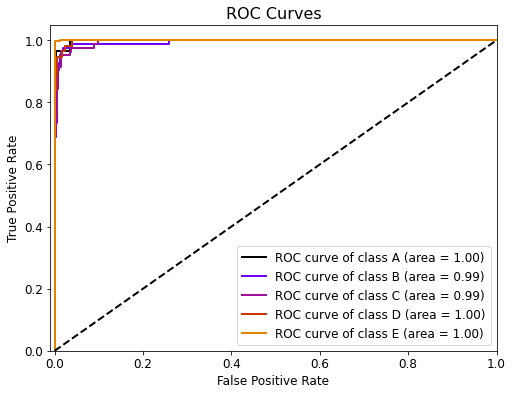

In [53]:
skplt.metrics.plot_roc(y_true=y_test, y_probas=svm_probs, figsize=(8,6), cmap = 'gnuplot', text_fontsize=12,
                       title_fontsize=16,plot_micro=False,plot_macro=False)
plt.xlim(-0.01,1)
plt.show()

In [60]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func = f_classif, k = 6)

X_new = selector.fit_transform(X_train_sm, y_train_sm)

names = df_feat.columns.values[selector.get_support()]

scores = selector.scores_[selector.get_support()]

names_scores = list(zip(names, scores))

ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])

imp = ns_df.sort_values('F_Scores', ascending=False)
imp

,Feat_names,F_Scores
1,TOT_ALKALINITY,1953.892508
4,TDS,877.686261
0,EC,870.906563
5,Total_hardness,684.381229
3,NA,657.981811
2,CA,582.698398


<Figure size 720x432 with 0 Axes>

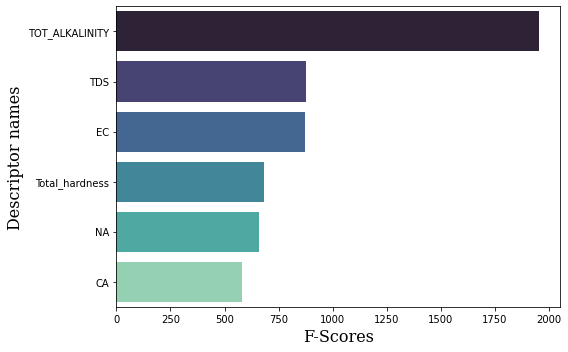

In [61]:
plt.figure(figsize=(10,6))

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

plt.figure(figsize=(8,5))

sns.barplot(data = imp, x = 'F_Scores', y = 'Feat_names', palette = 'mako')

plt.xlabel('F-Scores', fontdict=font)
plt.ylabel('Descriptor names', fontdict=font)
plt.tight_layout()

In [63]:
f_names = []
for i in range(0, len(imp)):
    f_names.append(imp['Feat_names'][i])
f_names

['EC', 'TOT_ALKALINITY', 'CA', 'NA', 'TDS', 'Total_hardness']

In [64]:
new_X = df_feat[['EC', 'TOT_ALKALINITY', 'CA', 'NA', 'TDS', 'Total_hardness']]
new_X

,EC,TOT_ALKALINITY,CA,NA,TDS,Total_hardness
0,-0.591508,-0.584732,-0.501819,-0.528786,-0.591031,-0.514874
1,-0.487198,-0.364845,-0.595174,-0.403927,-0.496994,-0.536793
2,-0.559479,-0.633596,-0.641852,-0.534733,-0.574182,-0.449843
3,-0.279009,-0.560300,-0.548497,-0.378240,-0.285785,-0.068923
4,-0.574628,-0.706891,-0.595174,-0.554923,-0.580888,-0.417126
...,...,...,...,...,...,...
2260,-0.597698,-1.170941,-0.665116,-0.512645,-0.621905,-0.721892
2261,-0.674914,-1.097801,-0.641852,-0.578960,-0.683879,-0.645775
2262,-0.658787,-1.122233,-0.455141,-0.546827,-0.671273,-0.547556
2263,-0.670196,-1.244295,-0.595044,-0.552574,-0.674567,-0.645669


In [65]:
X_train, X_test, y_train, y_test = train_test_split(new_X, df_y, test_size=0.3, random_state=101)

In [69]:
params_svm = {'C': [0.1,1, 10, 100, 1000], 'gamma': ['scale', 'auto'], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 

svm_gs = GridSearchCV(svm,params_svm,verbose=3,cv=5)
                      
svm_gs.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.1s
[CV 3/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.1s
[CV 4/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.1s
[CV 5/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.1s
[CV 1/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.2s
[CV 2/5] END .................C=0.1, gamma=scal

[CV 3/5] END ................C=10, gamma=auto, kernel=linear; total time=   0.0s
[CV 4/5] END ................C=10, gamma=auto, kernel=linear; total time=   0.0s
[CV 5/5] END ................C=10, gamma=auto, kernel=linear; total time=   0.0s
[CV 1/5] END ..................C=10, gamma=auto, kernel=poly; total time=   0.0s
[CV 2/5] END ..................C=10, gamma=auto, kernel=poly; total time=   0.0s
[CV 3/5] END ..................C=10, gamma=auto, kernel=poly; total time=   0.0s
[CV 4/5] END ..................C=10, gamma=auto, kernel=poly; total time=   0.0s
[CV 5/5] END ..................C=10, gamma=auto, kernel=poly; total time=   0.0s
[CV 1/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV 5/5] END ...............

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [70]:
#save best model
svm_best = svm_gs.best_estimator_
print(svm_gs.best_params_)

{'C': 1000, 'gamma': 'scale', 'kernel': 'linear'}


In [71]:
pred_svm = svm_best.predict(X_test)
print(accuracy_score(y_test,pred_svm))
pd.crosstab(y_test,pred_svm)  

0.9852941176470589


col_0,A,B,C,D,E
GRADE,,,,,
A,28,1,0,0,0
B,0,81,2,0,0
C,0,1,79,2,0
D,0,0,2,54,0
E,0,0,0,2,428


### Evaluating the feature reduced model with ROC plot

In [72]:
random_prob = [0 for _ in range(len(y_test))]
svm_probs = svm_best.predict_proba(X_test)

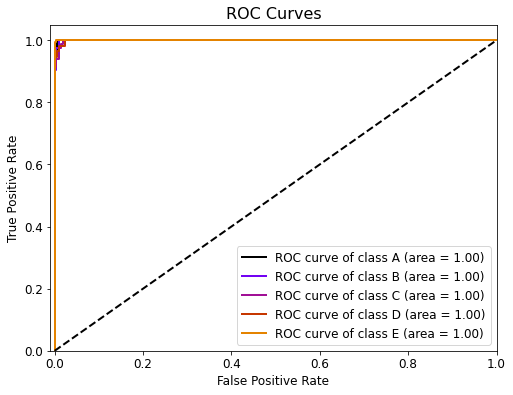

In [73]:
skplt.metrics.plot_roc(y_true=y_test, y_probas=svm_probs, figsize=(8,6), cmap = 'gnuplot', text_fontsize=12,
                       title_fontsize=16,plot_micro=False,plot_macro=False, )
plt.xlim(-0.01,1)
plt.show()

### Plot Correlation between the reduced features


Text(0.5, 1.0, 'Correlation Heatmap')

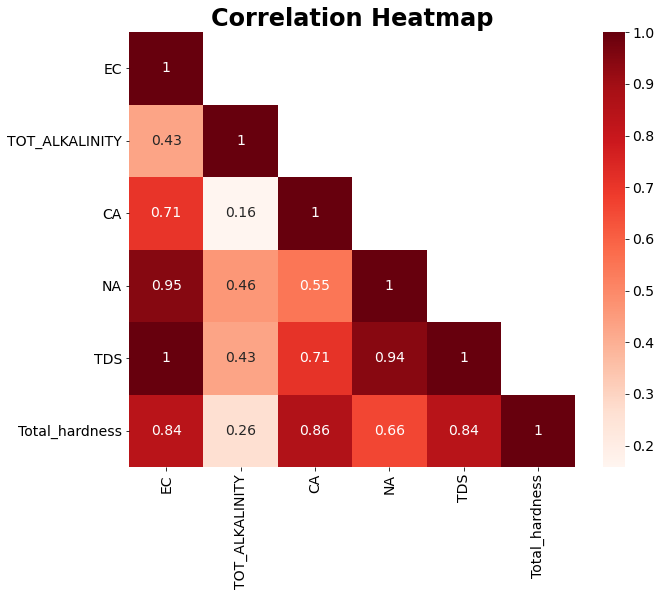

In [76]:
fig, ax = plt.subplots(figsize=(10,8))


matrix = np.triu(new_X.corr(), 1)

res = sns.heatmap(new_X.corr(), annot=True, cmap='Reds', annot_kws={'size': 14}, mask=matrix)

res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
cbar = res.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=14)
plt.title('Correlation Heatmap', fontsize = 24, fontweight = 'bold' )

#plt.savefig("Heatmap.png", dpi=300)